In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 二次関数の表記

任意の $n$ 変数二次関数 $f : \mathbb{R}^{n} \leftarrow \mathbb{R}$ は以下の形式で記述できる。

$f(x) = \frac{1}{2} x^T A x + b^T x + c$

ただし $x \in \mathbb{R}^{n}, A \in \mathbb{R}^{n \times n}, b \in \mathbb{R}^n, c \in \mathbb{R}$

ここで、 $\frac{1}{2} x^T A x$ が $x_{i}^{2}$ （係数は $\frac{1}{2} A_{i}$ ）
および $x_{i} x_{j}$ （係数は $\frac{1}{2} (A_{ij} + A_{ji})$ ）の項に、
$b^T x$ が $x_{i}$ の項に、 $c$ の項が定数項に対応する。

さらに、行列 $A$ は対称行列とする（対称でなくても、以下のように等価のまま書き換えることができる）。

$A'_{ij} = A'_{ji} = \frac{1}{2} (A_{ij} + A_{ji})$



In [25]:
############################
# N変数二次関数の生成
############################
N = 100
# A : 対称NxN行列
A = np.random.rand(N, N)
for i in range(N):
    A[i, i] *= (np.power(np.random.rand() + 10.0, 2.0)) 
for i in range(N):
    for stride in range(1, N - 1):
        j = (i + stride) % N
        t = 0.5 * (A[i, j] + A[j, i])
        A[i, j] = t
        A[j, i] = t
# b : N次元ベクトル
b = np.random.rand(N)
# c : スカラ値
c = np.random.rand()

# 二次関数
f = (lambda x: (0.5 * np.dot(x, np.dot(A, x))) + np.dot(b, x) + c)

np.min(np.linalg.eig(A)[0])

4.9855020470880325

In [5]:
############################
# プロット（2変数のみ）
############################

x1 = np.linspace(-1.0, 1.0, 101)
x2 = np.linspace(-1.0, 1.0, 101)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
#Y = np.array(list(map(f, list(X)))).reshape(X1.shape)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#surf = ax.plot_surface(X1, X2, Y, cmap='jet')

# 二次関数の勾配

上記の二次関数の勾配 $\nabla f(x)$ は以下のようになる。

$\nabla f(x) = A x + b$


# 最急降下法

これを用いて、パラメータ $x_{i}$ からパラメータ $x_{i + 1}$ に以下のように更新できる。

$x_{i + 1} = x_{i} - \alpha \nabla f(x_{i})$

これを最急降下法という。また以降ではステップサイズ　$\alpha$ を学習率と呼ぶ。


# 最適な学習率

ここで、最適な $\alpha$ は以下の関数 $g(\alpha)$ を最小化するものである（ただし $d_{i} = - \nabla f(x_{i})$ ）。

$$
\begin{eqnarray}
g(\alpha) &=& f(x_i + \alpha d_i) \\
 &=& \frac{1}{2} (x_i + \alpha d_i)^T A (x_i + \alpha d_i) + b^T (x_i + \alpha d_i) + c \\
 &=& \frac{1}{2} \{x_i^T A x_i + \alpha x_i^T A d_i + \alpha d_i^T A x_i + \alpha^2 d_i^T A d_i\} + \{b^T x_i + \alpha b^T d_i\} + c \\
 &=& \frac{1}{2} \{x_i^T A x_i + \alpha d_i^T A x_i + \alpha d_i^T A x_i + \alpha^2 d_i^T A d_i\} + \{b^T x_i + \alpha b^T d_v\} + c \\
 &=& \{\frac{1}{2} x_i^T A x_i + \alpha d_0^T A x_i + \frac{1}{2} \alpha^2 d_i^T A d_i\} + \{b^T x_i + \alpha b^T d_i\} + c \\
 &=& \{\frac{1}{2} d_i^T A d_i\} \alpha^2 + \{d_i^T A x_i + b^T d_i\} \alpha + \{\frac{1}{2} x_i^T A x_i + b^T x_i + c\} \\
 &=& \{\frac{1}{2} d_i^T A d_i\} \alpha^2 + \{d_i^T A x_i + d_i^T b\} \alpha + \{\frac{1}{2} x_i^T A x_i + b^T x_i + c\} \\
 &=& \{\frac{1}{2} d_i^T A d_i\} \alpha^2 + d_i^T \{A x_i + b\} \alpha + \{\frac{1}{2} x_i^T A x_i + b^T x_i + c\}
\end{eqnarray}
$$

より、 $g(\alpha)$ の導関数 $g'(\alpha)$ は、以下のようになる。

$$
\begin{eqnarray}
g'(\alpha) = \{d_i^T A d_i\} \alpha + d_i^T \{A x_i + b\}
\end{eqnarray}
$$

$g(\alpha)$ が最小値を持つ（$\Leftrightarrow$ $g(\alpha)$ が下に凸）ならば、
$g'(\alpha) = 0$ を満たす $\alpha$ で最小となる。

すなわち

$$
\begin{eqnarray}
\{d_i^T A d_i\} \alpha + d_i^T \{A x_i + b\} &=& 0 \\
\alpha &=& - \frac{d_i^T \{A x_i + b\}}{d_i^T A d_i}
\end{eqnarray}
$$


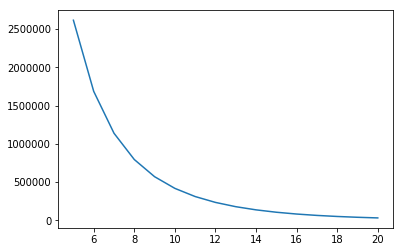

In [27]:
# これに現在のxを当てはめたものが勾配となる
grad_func = (lambda x: np.dot(A, x) + b)

# 最適な学習率
d_func = (lambda x: -grad_func(x))
numerator_alpha = (lambda x: np.dot(d_func(x), (np.dot(A, x) + b)))
denominator_alpha = (lambda x: np.dot(d_func(x), np.dot(A, d_func(x))))
alpha_func = (lambda x: -numerator_alpha(x) / denominator_alpha(x))

count = 20

x = []
y = []
d = []
alpha = []

x0 = np.random.rand(N) * 1000.0

x.append(x0)
y.append(f(x[0]))
d.append(d_func(x[0]))
alpha.append(alpha_func(x[0]))

for i in range(count):
    x.append(x[i] + alpha[i] * d[i])
    y.append(f(x[i + 1]))
    d.append(d_func(x[i + 1]))
    alpha.append(alpha_func(x[i + 1]))

y1 = np.array(y)

plt.plot(np.arange(y1.shape[0])[5:], y1[5:])

# 最急降下法の問題

上記のように、最急降下法は常に前回の勾配ベクトルに対して直角となる方向に降下する。

この方向は下図の緑矢印のように、必ずしも最小値の方向を向いていない（特に等高線が楕円の場合に顕著）。

<img src="img.png" width="200" height="300">

# 共役

行列 $A \in \mathbb{R}^{n \times n}$ が半正定値行列ならば、 $A = P^T P (P \in \mathbb{R}^{n \times n})$ と分解できる。

また、零でないベクトル $u, v \in \mathbb{R}^{n}$ を考えると、以下が成り立つ。

$$
\begin{eqnarray}
(Pu)^T (Pv) = 0 &\Leftrightarrow& u^T P^T P v = 0 \\
 &\Leftrightarrow& u^T A v = 0
\end{eqnarray}
$$

すなわち、 $u^T A v = 0$ が、元の空間を $P$ によって変形した空間で $u, v$ が直交することの必要十分条件となっている。

零でないベクトル $u, v \in \mathbb{R}^{n}$ が  $u^T A v = 0$ を満たす場合、
$u, v$ は（$A$ に関して）共役であるという。

# 共役勾配法

上記の問題を解消するために、今回の更新ベクトル $d_i = - \nabla f(x_i)$ に、
前回の更新ベクトル $d_{i - 1}$ 成分を含めることで最小値に向かうようにする。

すなわち、以下におき、 $\beta_{i - 1} \in \mathbb{R}$ を正しく決められればよい。

$$
d_{i} = - \nabla f(x_i) + \beta_{i - 1} d_{i - 1}
$$

ここで、 $d_{i - 1}, d_{i}$ が行列 $A$ に関して共役となればよいので、

$$
\begin{eqnarray}
d_{i}^T A d_{i - 1} &=& 0 \\
\{- \nabla f(x_{i})\ + \beta_{i - 1} d_{i - 1}\}^T A d_{i - 1} &=& 0 \\
- \nabla f(x_{i})^T A d_{i - 1} + \beta_{i - 1} d_{i - 1}^T A d_{i - 1} &=& 0 \\
\beta_{i - 1} d_{i - 1}^T A d_{i - 1} &=& \nabla f(x_{i})^T A d_{i - 1} \\
\beta_{i - 1} &=& \frac{\nabla f(x_{i})^T A d_{i - 1}}{d_{i - 1}^T A d_{i - 1}}
\end{eqnarray}
$$

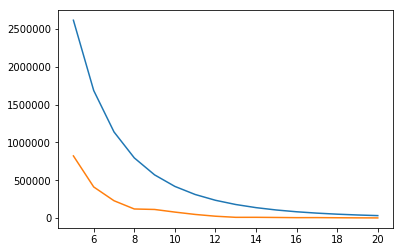

In [29]:
numerator_beta = (lambda x0, x1: np.dot(grad_func(x1), np.dot(A, d_func(x0))))
denominator_beta = (lambda x0, x1: np.dot(d_func(x0), np.dot(A, d_func(x0))))
beta_func = (lambda x0, x1: numerator_beta(x0, x1) / denominator_beta(x0, x1))

x = np.zeros((count + 1, N))
y = np.zeros(count + 1)
d = np.zeros((count + 1, N))
alpha = np.zeros(count + 1)
beta = np.zeros(count + 1)

# 1 : Initialize
x[0] = x0
y[0] = f(x0)
d[0] = d_func(x0)

for i in range(count):
    # 2 : Find best step size
    #     最適な学習率を求める
    alpha[i] = alpha_func(x[i])
    # 3 : Update the current guess
    #     勾配降下によりパラメータを更新する
    x[i + 1] = x[i] + alpha[i] * d[i]
    y[i + 1] = f(x[i + 1])
    # 4 : Update the direction:
    #     次回以降のd_{i+1}はd_{i}と共役となるようにする
    beta[i] = beta_func(x[i], x[i + 1])
    d[i + 1] = - grad_func(x[i + 1]) + beta[i] * d[i]

y2 = np.array(y)

plt.plot(np.arange(y1.shape[0])[5:], y1[5:])
plt.plot(np.arange(y1.shape[0])[5:], y2[5:])
